# Data Collection, Analysis, and Visualization for Top Youtube Channels and Genres.

<img src="https://lh3.googleusercontent.com/3zkP2SYe7yYoKKe47bsNe44yTgb4Ukh__rBbwXwgkjNRe4PykGG409ozBxzxkrubV7zHKjfxq6y9ShogWtMBMPyB3jiNps91LoNH8A=s500" width="300" height="400">

[Explanation]


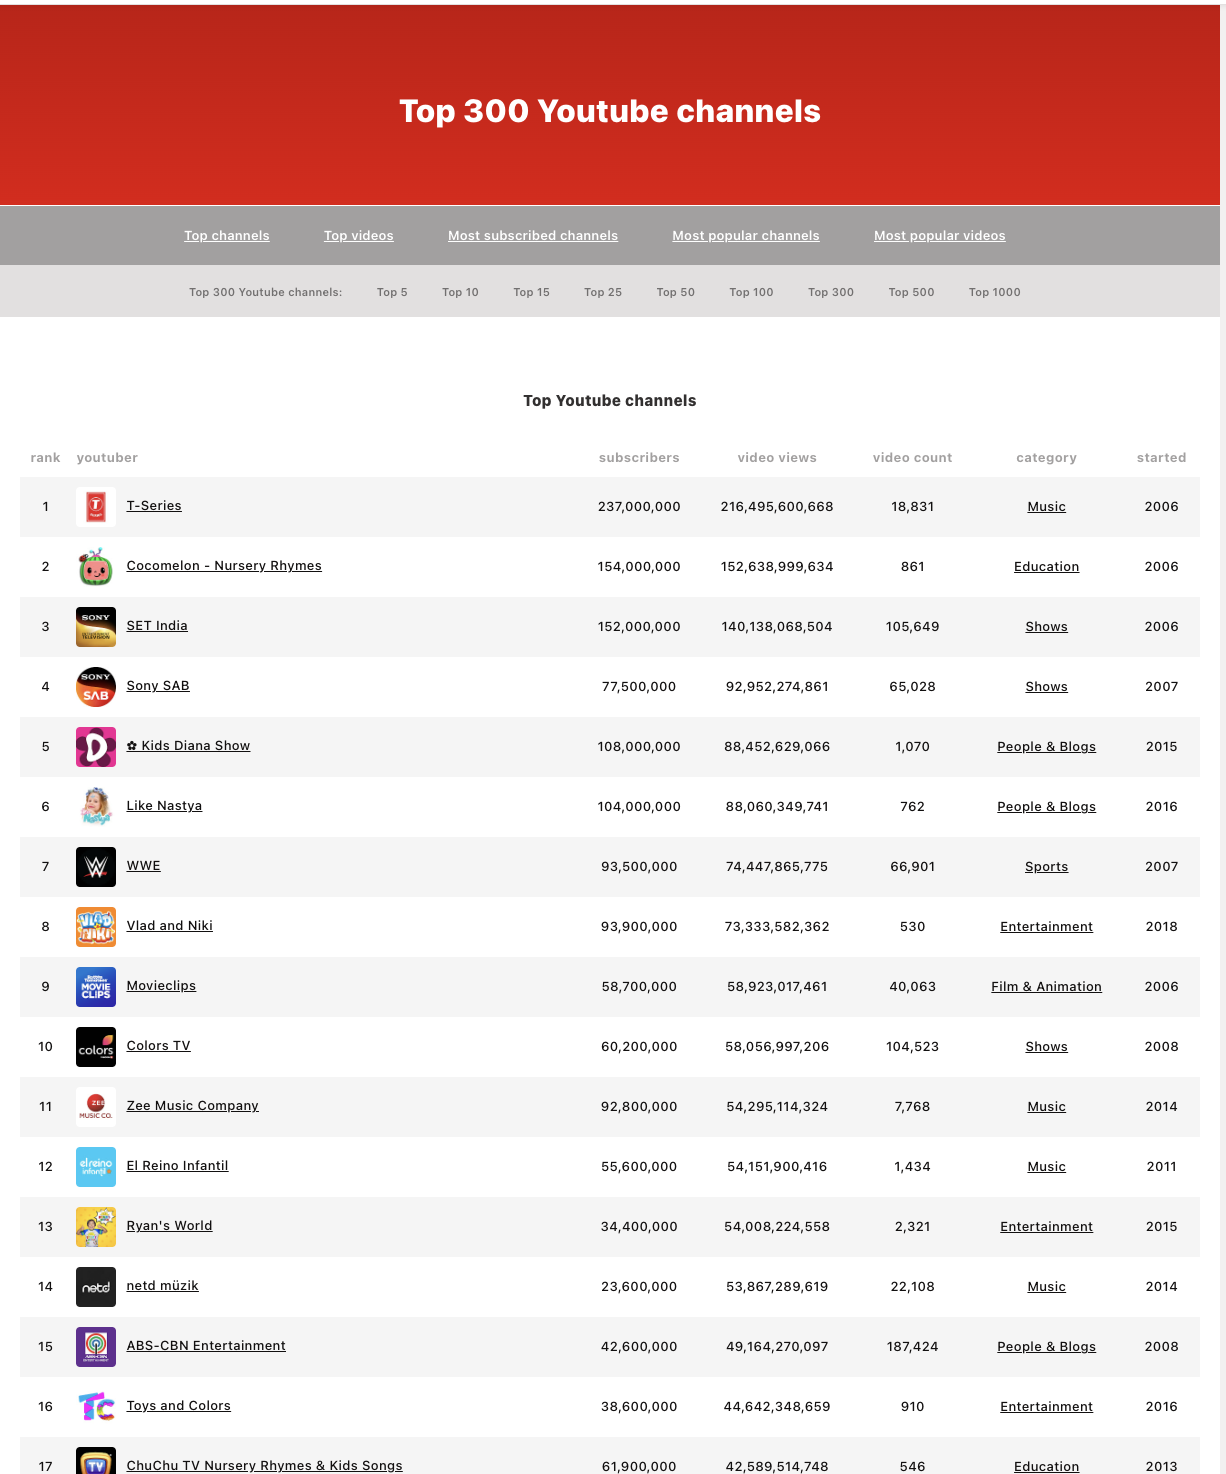

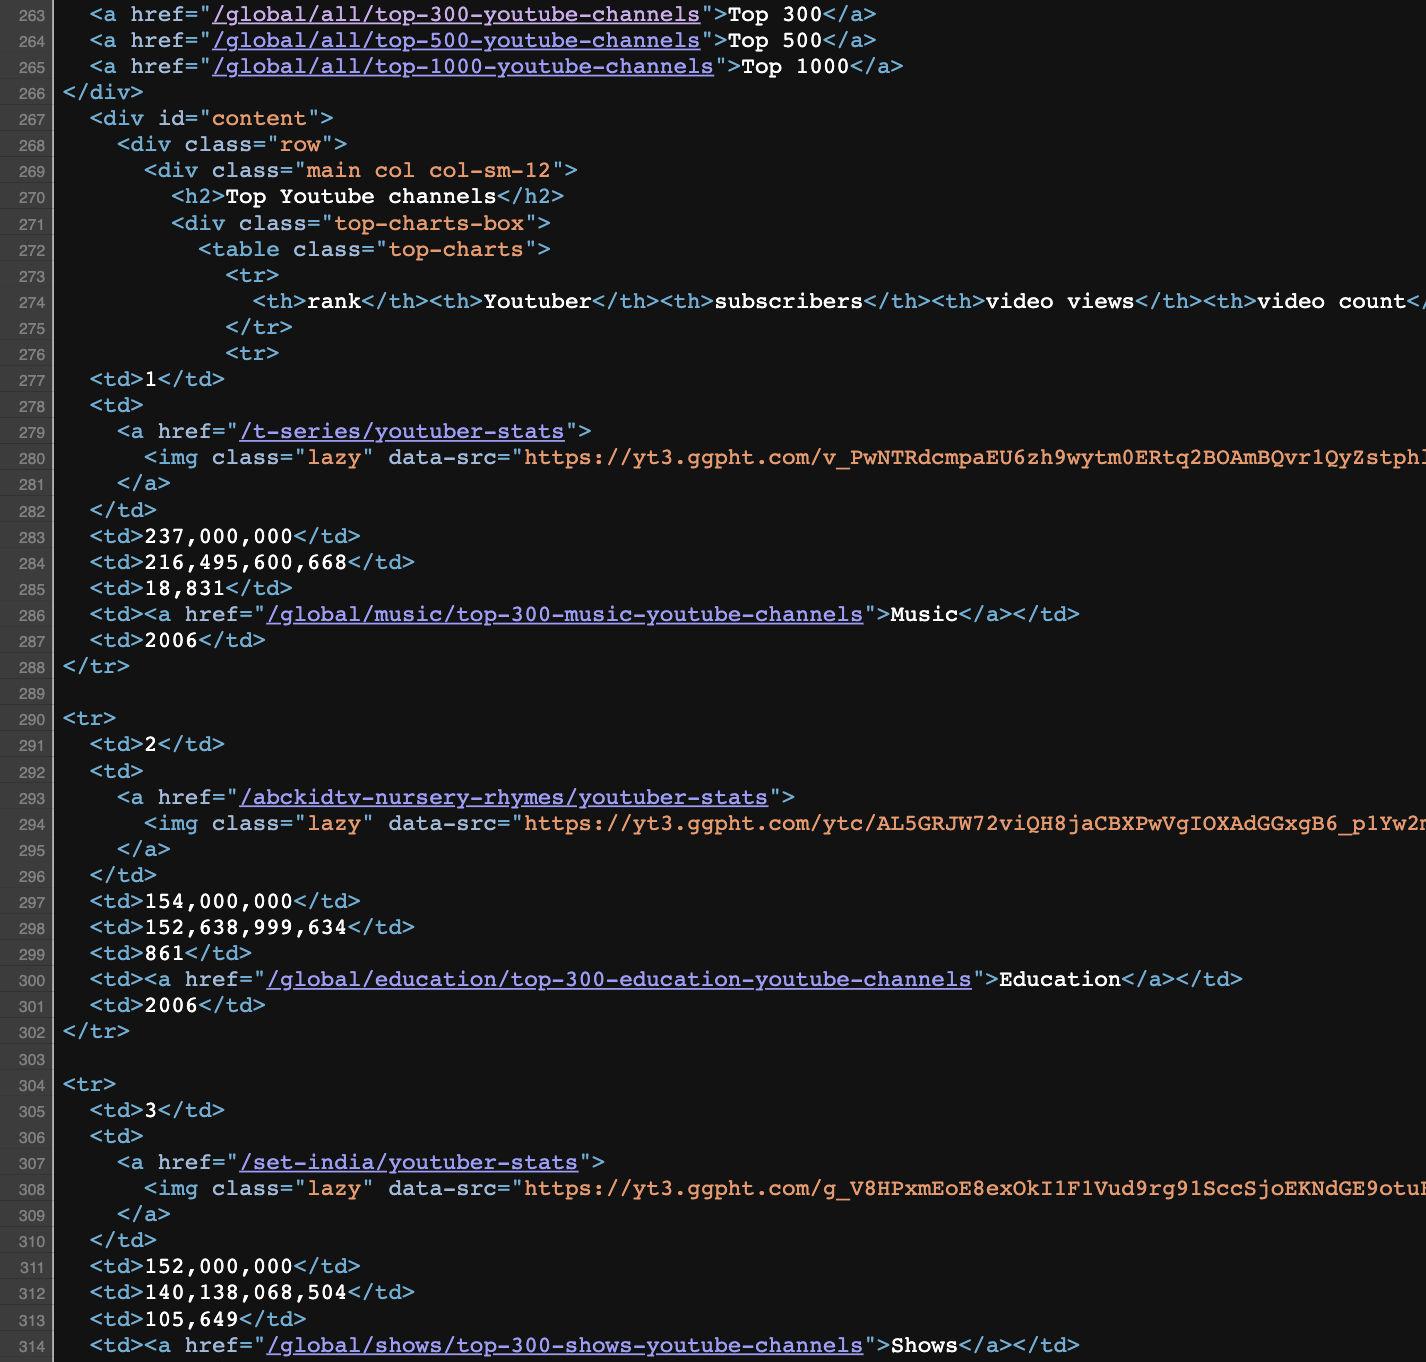

## **0. Preparation** 

Import libraries (BeautifulSoup, Pandas, Numpy, Matplotlib)

https://beautiful-soup-4.readthedocs.io/en/latest/

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


try: 
    import seaborn as sns 
    print('imported')
except: 
    !pip install seaborn
    print('install')

imported


In [2]:
#Read webpage and parse it with Beautiful Soup

url = 'https://us.youtubers.me/global/all/top-300-youtube-channels'
opened_webpage = requests.get(url)
bs = BeautifulSoup(opened_webpage.content, 'html.parser')

print ("Webpage loaded and parsed successfully...")

Webpage loaded and parsed successfully...


# Perform Extract-Transform-Load (ETL) Process

## **01. Extract** 
I begin the ETL process by extracting the data from the Top 300 Youtubers chat on the selected website. 

I use beautiful soup to find all tags with the table element. Then, I create a variable called 'rows' to house all table row ('tr') data from within the tables. Finally, I create an empty list to store my data.  

To transform the table data I extracted from the previous step, I first iterated through each table row starting after the table headers to the final table row. From here, I created column variable that took in all the table data 'td'. For each row, I housed the data into columns for each of the table headers. Through each iteration, I used the text.strip() method to house the data under the row for each column. 

In [3]:
#Extract the HTML table data for 'Top Charts' and create variable for table rows
table = bs.find('table')
rows = table.find_all('tr')

print(table)
    
#Define an empty list where data will be stored
final_data = [] 

#For each table row, after the table headers, find columns and define the column names 
for row in rows[1:]: 
    column = row.find_all('td')
    Rank = column[0].text.strip()
    Channel_Name = column[1].text.strip()
    Subscriber_Count = column[2].text.strip()
    Video_Views = column[3].text.strip()
    Video_Count = column[4].text.strip()
    Genre = column[5].text.strip()
    Channel_Started = column[6].text.strip()
    
    #Append a list containing the column data for each row in the table to the final_data list, resulting in an array
    final_data.append([Rank, Channel_Name, Subscriber_Count, Video_Views, Video_Count, Genre, Channel_Started])    

print(final_data) 

<table class="top-charts">
<tr>
<th>rank</th><th>Youtuber</th><th>subscribers</th><th>video views</th><th>video count</th><th>category</th><th>started</th>
</tr>
<tr>
<td>1</td>
<td>
<a href="/t-series/youtuber-stats">
<img alt="T-Series" class="lazy" data-src="https://yt3.ggpht.com/v_PwNTRdcmpaEU6zh9wytm0ERtq2BOAmBQvr1QyZstphlpcPUqjbX3wqIvSRR9bWIgSjmRUJcwE=s88-c-k-c0x00ffffff-no-rj" src="data:image/gif;base64,R0lGODdhAQABAJEAAAAAAPLw8P///wAAACH5BAkAAAMALAAAAAABAAEAAAICTAEAOw=="/>T-Series
    </a>
</td>
<td>237,000,000</td>
<td>216,495,600,668</td>
<td>18,831</td>
<td><a href="/global/music/top-300-music-youtube-channels">Music</a></td>
<td>2006</td>
</tr>
<tr>
<td>2</td>
<td>
<a href="/abckidtv-nursery-rhymes/youtuber-stats">
<img alt="Cocomelon - Nursery Rhymes" class="lazy" data-src="https://yt3.ggpht.com/ytc/AL5GRJW72viQH8jaCBXPwVgIOXAdGGxgB6_p1Yw2mOkfCA=s88-c-k-c0x00ffffff-no-rj-mo" src="data:image/gif;base64,R0lGODdhAQABAJEAAAAAAPLw8P///wAAACH5BAkAAAMALAAAAAABAAEAAAICTAEAOw=="/>C

## **02 Transform**

To transform the data, I first converted the data to a data frame and then, I cleaned the data by checking for duplicates. Then, I combined values with redundant attributes into a single column. Finally, I removed rows with empty string values in order to have cleaner data to analyze.

**Convert to DataFrame**
- Use pandas to convert the array into a DataFrame with specified column names

In [4]:
df = pd.DataFrame(final_data)
df.columns = ['Rank', 'Channel_Name', 'Subscriber_Count', 'Video_Views','Video_Count', 'Genre', 'Channel_Started']

# Print 10 elements in the dataframe
df.head(10)

,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,T-Series,"237,000,000","216,495,600,668","18,831",Music,2006
1,2,Cocomelon - Nursery Rhymes,"154,000,000","152,638,999,634",861,Education,2006
2,3,SET India,"152,000,000","140,138,068,504","105,649",Shows,2006
3,4,Sony SAB,"77,500,000","92,952,274,861","65,028",Shows,2007
4,5,✿ Kids Diana Show,"108,000,000","88,452,629,066","1,070",People & Blogs,2015
5,6,Like Nastya,"104,000,000","88,060,349,741",762,People & Blogs,2016
6,7,WWE,"93,500,000","74,447,865,775","66,901",Sports,2007
7,8,Vlad and Niki,"93,900,000","73,333,582,362",530,Entertainment,2018
8,9,Movieclips,"58,700,000","58,923,017,461","40,063",Film & Animation,2006
9,10,Colors TV,"60,200,000","58,056,997,206","104,523",Shows,2008


### Cleaning
**Check for Duplicates and Remove If Present**



In [5]:
num_duplicates = df.duplicated().sum() 
print(f"Number of duplicates before: {num_duplicates}")

#Delete duplicate rows
df = df.drop_duplicates()

num_of_duplicates = df.duplicated().sum()
print (f" Number of duplicates after removing :{num_of_duplicates}")

Number of duplicates before: 0
 Number of duplicates after removing :0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              300 non-null    object
 1   Channel_Name      300 non-null    object
 2   Subscriber_Count  300 non-null    object
 3   Video_Views       300 non-null    object
 4   Video_Count       300 non-null    object
 5   Genre             300 non-null    object
 6   Channel_Started   300 non-null    object
dtypes: object(7)
memory usage: 18.8+ KB


There are no null value entries, but a problem arises because all columns have string data

#### **Combining Values in a Column**

First, I will combine some unique values in the 'Genre' section since they could be nested under the 'Film & Entertainment' category. 

In [7]:
#Check unique values in the Genre column
genre_val = df['Genre'].unique()

#Find how many values there are
genre_count = genre_val.size

print("\nUnique values from Genre column: \n", genre_val, '\nCount:', genre_count)

#Update the Genre column to include the replaced column names from ('Shows', 'Trailers') to "Film & Animation" 
df['Genre'] = df['Genre'].replace(['Shows', 'Trailers'], 'Film & Animation')
df.head(100)

#Updated values and count
genre_val = df['Genre'].unique()
genre_count = genre_val.size

print(genre_val, genre_count)



Unique values from Genre column: 
 ['Music' 'Education' 'Shows' 'People & Blogs' 'Sports' 'Entertainment'
 'Film & Animation' 'Comedy' '' 'Gaming' 'Howto & Style' 'News & Politics'
 'Pets & Animals' 'Trailers'] 
Count: 14
['Music' 'Education' 'Film & Animation' 'People & Blogs' 'Sports'
 'Entertainment' 'Comedy' '' 'Gaming' 'Howto & Style' 'News & Politics'
 'Pets & Animals'] 12


#### **Removing rows with empty string values from the 'Genre' Column**

When looking through the website chart data, I noticed 4 youtube channels that had empty entries in the 'Genre' column. Since they were not recognized as NaN, I had to replace the empty cells with and nan value to ensure the data was clean and to prevent future problems during the analysis and visualization phases.

In [8]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Genre"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              296 non-null    object
 1   Channel_Name      296 non-null    object
 2   Subscriber_Count  296 non-null    object
 3   Video_Views       296 non-null    object
 4   Video_Count       296 non-null    object
 5   Genre             296 non-null    object
 6   Channel_Started   296 non-null    object
dtypes: object(7)
memory usage: 18.5+ KB


Now, we have 296 channels all with string data type entries

#### **Transform column values into integers and take out the commas in the numbers**

In order to use unique values I will convert the 3 columns with object data types into integer data types. 

In [9]:
col_convert = ['Subscriber_Count', 'Video_Views', 'Video_Count']

df[col_convert] = df[col_convert].replace(',', '', regex=True)
df[col_convert] = df[col_convert].astype(int)

df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              296 non-null    object
 1   Channel_Name      296 non-null    object
 2   Subscriber_Count  296 non-null    int64 
 3   Video_Views       296 non-null    int64 
 4   Video_Count       296 non-null    int64 
 5   Genre             296 non-null    object
 6   Channel_Started   296 non-null    object
dtypes: int64(3), object(4)
memory usage: 18.5+ KB


,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,T-Series,237000000,216495600668,18831,Music,2006


## **03. Load** 

 **Export to CSV Format**

Convert the DataFrame into CSV format and store the table on the local disk to be used later. Check that the data types converted to integer. 

In [10]:
df.to_csv("Top-300-Youtube-Channels.csv")
df = pd.read_csv('Top-300-Youtube-Channels.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        296 non-null    int64 
 1   Rank              296 non-null    int64 
 2   Channel_Name      296 non-null    object
 3   Subscriber_Count  296 non-null    int64 
 4   Video_Views       296 non-null    int64 
 5   Video_Count       296 non-null    int64 
 6   Genre             296 non-null    object
 7   Channel_Started   296 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 18.6+ KB


# Visualization & Analysis

 #### **Questions:**
- What is the most popular Youtube channel genre type according to the website chart and which Genre had the greatest video output?. This will require 2 graphs:
    1. **Genre & Frequency**
        - `Bar graph`
    2. **Genre & Video_Count Sum**
        - `Bar graph`


### 1. **Genre & Frequency**

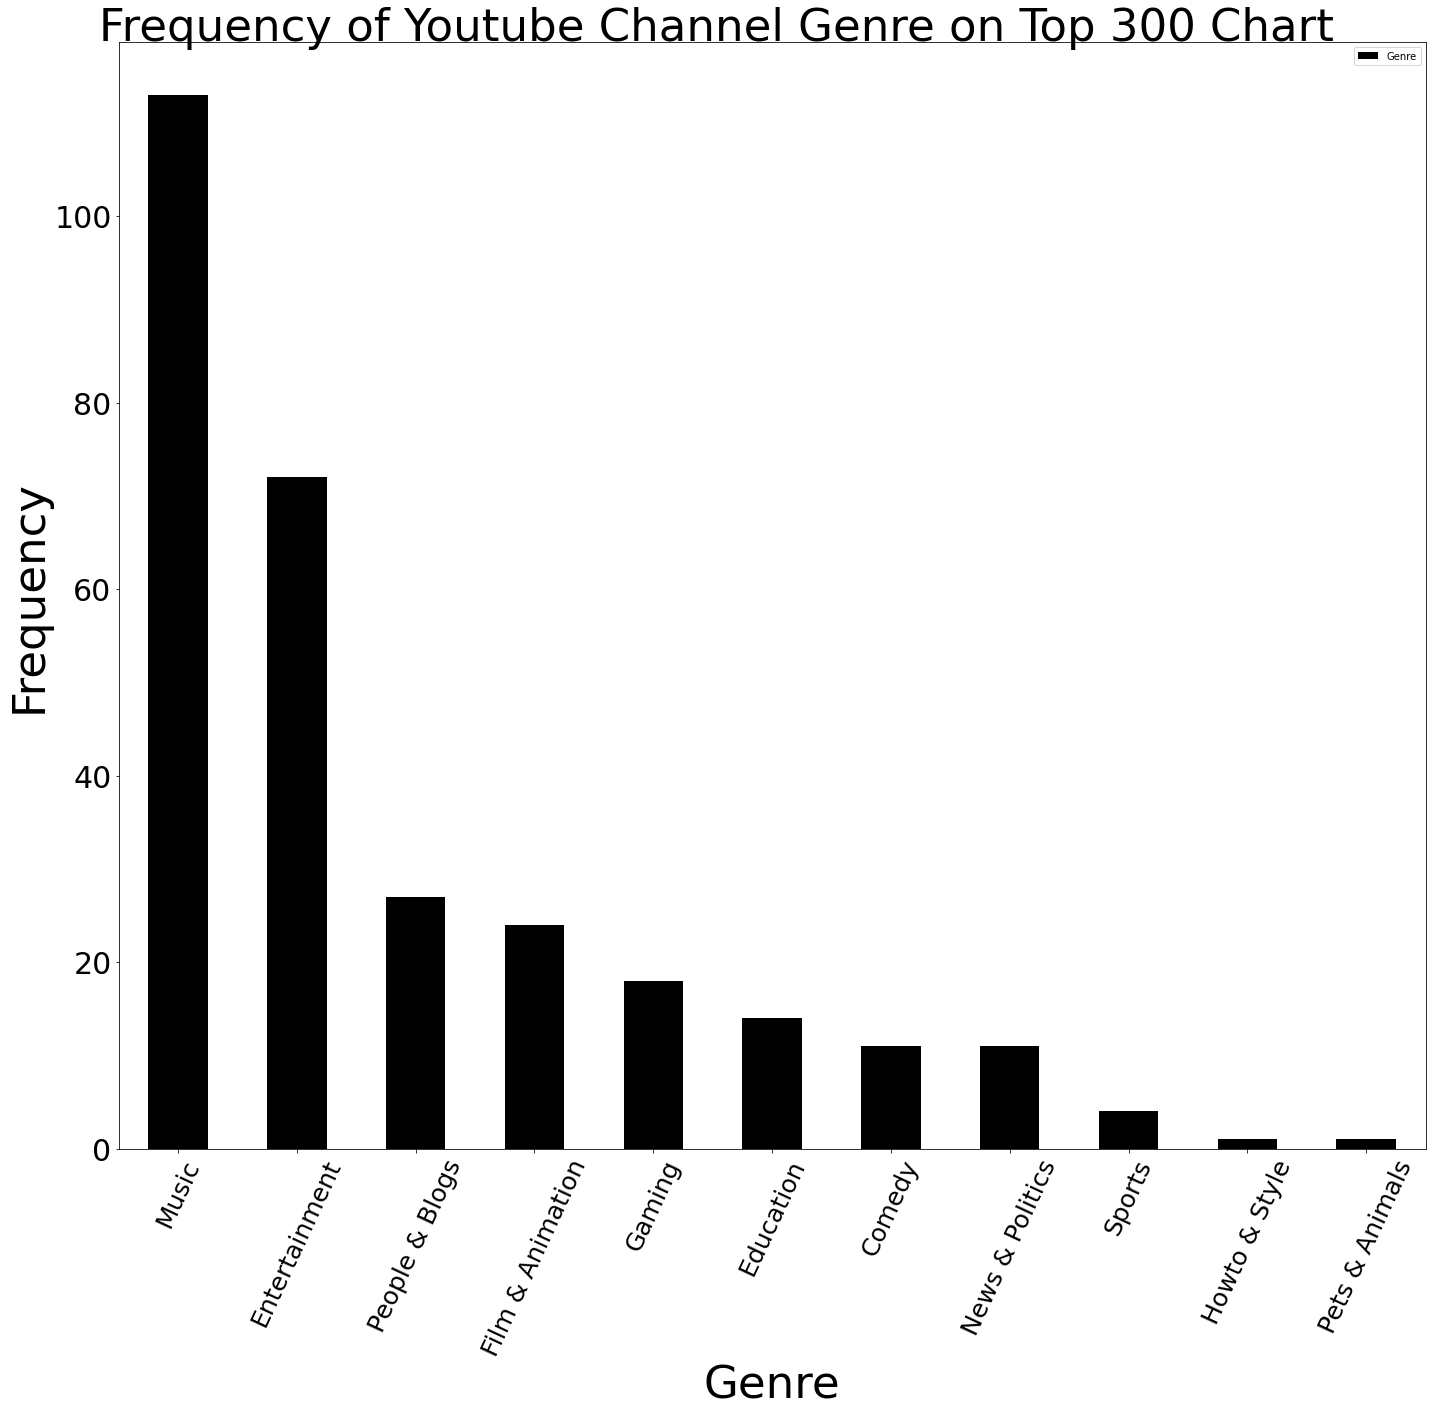

In [11]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams["figure.autolayout"] = True

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=30)

fig, ax = plt.subplots()

#Value counts method returns obj containing counts of unique val, resulting obj will be in descending order
df['Genre'].value_counts().plot(ax=ax, kind='bar', xlabel='Genre', color='black') #, ylabel='frequency'

fig.suptitle('Frequency of Youtube Channel Genre on Top 300 Chart', fontsize=45)
plt.xlabel('Genre', fontsize=45)
plt.ylabel('Frequency',fontsize=45)
plt.legend()

ax.set_xticklabels(labels = df["Genre"].value_counts().index, rotation=65)

plt.show()

###   **2. Genre & Video_Count Sum**


In [12]:
bar_df = df.groupby('Genre').agg({'Video_Count':'sum'}).reset_index()
bar_df

,Genre,Video_Count
0,Comedy,23731
1,Education,14376
2,Entertainment,2246685
3,Film & Animation,413552
4,Gaming,222900
5,Howto & Style,6022
6,Music,402475
7,News & Politics,1638431
8,People & Blogs,590975
9,Pets & Animals,672


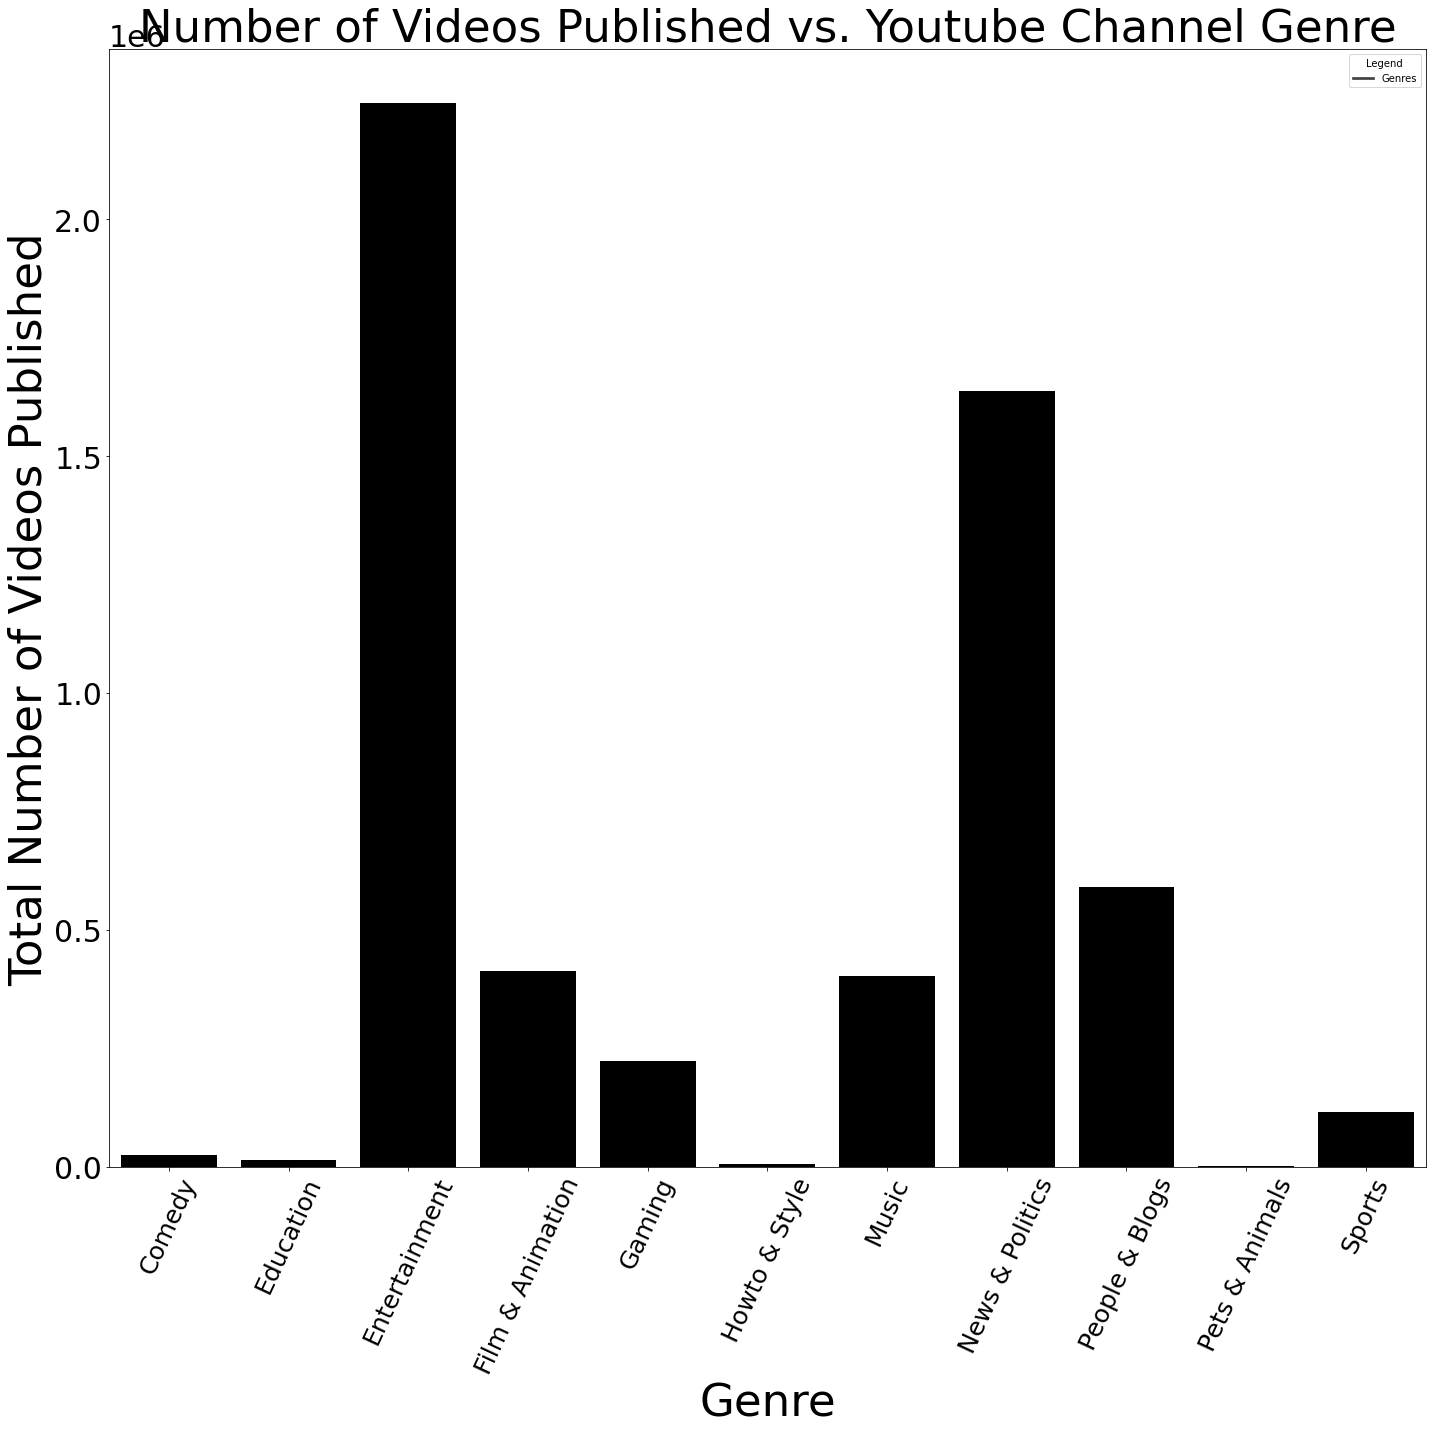

In [13]:
sns.barplot(data=bar_df, x='Genre', y='Video_Count', color='black')

#df['Genre'].value_counts().plot(ax=ax, kind='bar', xlabel='Genre', color='black') #, ylabel='frequency'

plt.title('Number of Videos Published vs. Youtube Channel Genre', fontsize=45)
plt.xlabel('Genre', fontsize=45)
plt.ylabel('Total Number of Videos Published', fontsize=45)
plt.xticks(rotation=65)
plt.legend(title='Legend', loc='upper right', labels=['Genres'])

plt.show()

**Insights:**

On the first bar graph plotting Youtube channel genre and frequency in the Top 300 Channel List, the 'Music' genre had the most appearances in the list (>100). The 2nd most popular genre was 'Entertainment' and the 3rd was 'People & Blogs'. I was surprised that the 'Gaming' genre was 5th in the list as there is a large gaming community on Youtube. 

On the second bar graph plotting the Total number of videos published by each youtube channel genre, the genre with the highest number of videos was 'Entertainment' with a video count of 2,246,685 and the second highest was 'News & Politics' with a video count of 1,638,431. Finally the third highest was the 'People & Blogs' genre with a video count of 590,975. Surprisingly, the 'Music' genre, which had the greatest frequency of Youtube channels on the previous graph, came in 5th on this graph. 